In [1]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

In [2]:
df = pd.read_csv(url, header=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
0     569 non-null int64
1     569 non-null object
2     569 non-null float64
3     569 non-null float64
4     569 non-null float64
5     569 non-null float64
6     569 non-null float64
7     569 non-null float64
8     569 non-null float64
9     569 non-null float64
10    569 non-null float64
11    569 non-null float64
12    569 non-null float64
13    569 non-null float64
14    569 non-null float64
15    569 non-null float64
16    569 non-null float64
17    569 non-null float64
18    569 non-null float64
19    569 non-null float64
20    569 non-null float64
21    569 non-null float64
22    569 non-null float64
23    569 non-null float64
24    569 non-null float64
25    569 non-null float64
26    569 non-null float64
27    569 non-null float64
28    569 non-null float64
29    569 non-null float64
30    569 non-null float64
31    569 non-null float64
dtypes: float64(30), int64(1), obj

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
# Злокачественные - 1, доброкачественные - 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
# Применим анализ главных компонент, чтобы снизить размерность с 30 значений до 2-х мерного пространства
# Стандартизируем все значения
# Применим классификатор - Логистическая регрессия
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scl', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('clf', LogisticRegression(random_state=1))
])
pipe.fit(X_train, y_train)

# Оценим правильность (верность) на тестовом наборе
print pipe.score(X_test, y_test)

0.9473684210526315


C:\Users\misha\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Применим кросс-валидацию

In [6]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, random_state=1)
folds=list(kfold.split(X_train,y_train))
print folds

[(array([ 46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
       150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
       202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214,
       215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 

In [7]:
scores=[]
for k, (train, test) in enumerate(kfold.split(X_train, y_train)):
    pipe.fit(X_train[train], y_train[train])
    score = pipe.score(X_train[test], y_train[test])
    scores.append(score)
    # Выведем распределение классов и точность работы на каждом блоке
    print np.bincount(y_train[train]), score

[256 153] 0.8913043478260869
[256 153] 0.9782608695652174
[256 153] 0.9782608695652174
[256 153] 0.9130434782608695
[256 153] 0.9347826086956522
[257 153] 0.9777777777777777
[257 153] 0.9333333333333333
[257 153] 0.9555555555555556
[257 153] 0.9777777777777777
[257 153] 0.9555555555555556


In [15]:
# То же самое, используя cross_val_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=10)
print(scores.reshape(-1, 1))

[[0.89130435]
 [0.97826087]
 [0.97826087]
 [0.91304348]
 [0.93478261]
 [0.97777778]
 [0.93333333]
 [0.95555556]
 [0.97777778]
 [0.95555556]]


In [16]:
# Используем кривые обучения
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve 
pipe = Pipeline([
    ('scl', StandardScaler()),
    ('clf', LogisticRegression(random_state=0, penalty='l2'))
])

In [17]:
train_size, train_score, test_score = learning_curve(pipe, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=10)

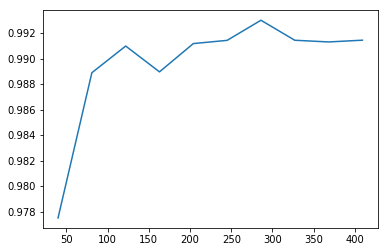

In [18]:
train_mean=np.mean(train_score, axis=1)
train_std=np.std(train_score, axis=1)
test_mean=np.mean(test_score, axis=1)
test_std=np.mean(test_score, axis=1)
plt.plot(train_size, train_mean)

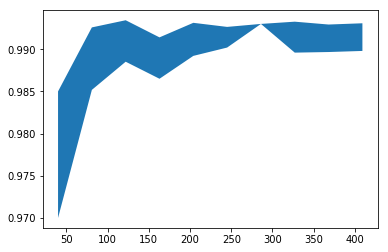

In [20]:
plt.fill_between(train_size, train_mean+train_std, train_mean-train_std)

(0.8, 1)

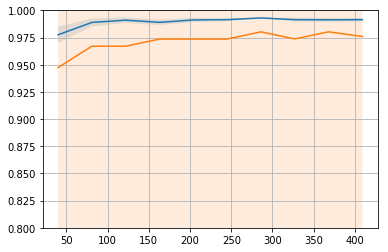

In [31]:
plt.plot(train_size, train_mean)
plt.fill_between(train_size, train_mean+train_std, train_mean-train_std, alpha=0.15) # стандартное отклонение средних точностей
plt.plot(train_size, test_mean)
plt.fill_between(train_size, test_mean+test_std, test_mean-test_std, alpha=0.15)
plt.grid()
plt.ylim([0.8, 1])

In [ ]:
# На графи